# <font color = 'red'>Chapter 3. 평가

    
- ***머신러닝의 분류 평가 지표에 대해서 알아보자***

![title](1.jpg)

# <font color = 'green'>정확도

- Accuracy = **예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수**


- 직관적


- 데이터 구성에 따라 **ML 모델 성능 왜곡 가능성**이 있음


- **레이블 값이 불균형한 데이터에서 적합하지 않음**(특히, 이진분류)

# <FONT COLOR = 'GREEN'>오차행렬

- **이진 분류의 예측 오류가 얼마인지, 어떤 유형의 예측 오류가 발생하고 있는지를 나타내는 지표**

![title](3.jpg)

## ✔ 오차 행렬을 활용한 정확도

![title](오차정확.jpg)

# <font color = 'green'>정밀도와 재현율

## ✔ 정밀도

![title](5.jpg)

## ✔ 재현율

![title](6.jpg)

# <font color = 'green'>오차행렬, 정밀도, 재현율을 활용한 모델의 성능 평가

- **정밀도** 계산 : **precision_score()**
- **재현율** 계산 : **recall_score()**

In [1]:
# 타이타닉 생존자 데이터 전처리 함수
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Null 처리 
def filna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

    
# 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis = 1, inplace = True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 앞 문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 위의 전처리 함수 호출
def transform_features(df):
    df = filna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 평가를 한꺼번에 호출하는 함수
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [3]:
# 로지스틱 회귀를 기반으로 타이타닉 생존자 예측 및 confusuion matrix, accuracy, precision, recall 평가 수행
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/user/CUAI/DataSet/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis = 1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state =11)

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


# <font color = 'green'>정밀도(precision) / 재현율(recall) 트레이드오프

- **어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지는 현상**
- **<font color = 'red'>분류 결정 임계값(Threshold)을 조정**해 정밀도 또는 재현율의 수치를 높일 수 있음

## ✔ predict_proba() : 개별 데이터 별로 예측 확률을 반환

- ***입력 파라미터***
    - **데스트 피처 데이터 세트** 입력
    
    
- ***반환 값***
    - **개별 클래스의 예측 확**률을 **ndarray m x n 형태**로 반환
    - m : 입력 값의 레코드 수
    - n : 클래스 값 유형

In [4]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n',pred_proba[:3])
# 예측 확률 array와 예측 결괏값 array를 병합(concatenate) -> 예측 확률과 결괏값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis = 1)
print('\n')
print('두 개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3]) # 샘플 추출

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]


두 개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4623509  0.5376491  1.        ]
 [0.87875882 0.12124118 0.        ]
 [0.87717457 0.12282543 0.        ]]


## ✔ predict()

- ***작동 방식***
    - predict_proba() 호출 결과로 반환된 배열에서 **분류 결정 임계값보다 큰 값**이 들어있는 **칼럼의 위치**를 받아서 **최종적으로 예측 클래스를 결정**

## ✔ 사이킷런의 정밀도/재현율 트레이드오프 방식 이해하기

- predict() 구현을 위해 **Binarizer 클래스** 이용
    - **fit_transform()** 메서드 이용

### Binarizer 사용법 익히기

In [5]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# x의 개별 원소들이 threshold( = 1.1)값보다 같거나 작으면 0, 크면 1 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Binarizer를 이용한 사이킷런 predict()의 의사(pseudo) 코드 만들기

In [6]:
custom_threshold = 0.5 # 분류 결정 임계값

pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 반환값의 Positive 클래스 칼럼 하나만 추출해서 Binarizer 적용

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


In [7]:
# 임계값 0.4로 수정시

custom_threshold = 0.4 # 분류 결정 임계값

pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 반환값의 Positive 클래스 칼럼 하나만 추출해서 Binarizer 적용

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


## ✔ 임계값과 재현율/정밀도 사이의 관계

- ***임계값을 낮추면***

    - **<font color = 'red'>Positive 예측값 증가**
    
    - **<font color = 'red'>재현율 값 증가**( TP / (**FN** + TP) )
        - <font color = 'black'>FN(예측 : Negative, 실제 : Positive) 값 감소
    
    - **<font color = 'red'>정밀도 값 감소**( TP / (**FP** + TP) )
        - <font color = 'black'>FP(예측 : Positive, 실제 : Negative) 값 증가

### 임계값 변화에 따른 평가 지표 값 알아보기 : precision_recall_curve() API 사용

- ***입력 파라미터***
    - y_true : 실제 클래스값 배열
    - probas_pred : Positive 칼럼의 예측 확률 배열
    
    
   
- ***반환값***
    - 정밀도 : 임계값별 정밀도 값을 배열로 반환
    - 재현율 : 임계값별 재현율 값을 배열로 반환

In [8]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률 추측
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recall, thresholds = precision_recall_curve(y_test, pred_proba_class1) # 순서대로 정밀도, 재현율, 임계값

# 147개의 반환된 임계값 배열 로우에서 샘플로 10건만 추출, 15 step
thr_index = np.arange(0,thresholds.shape[0],15)

print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3)) # np.round_(a, N) : N 소수점 자릿수까지 반올림
print('샘플 임계값별 재현율:', np.round(recall[thr_index],3))

샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


출력 결과, **임계값을 증가**시킬수록 **재현율 값을 낮아지고**, **정밀도 값이 높아진다**는 것을 알 수 있음.
- **임계값**과 **정밀도**는 **비례**
- **임계값**과 **재현율**은 **반비레**

# <font color = 'green'>F1 스코어
    
- *정밀도와 재현율을 결합한 지표*
- *정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.*

![title](f1스코어.png)

## ✔ f1_score() : F1 스코어 구하는 사이킷런의 API

In [9]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,pred)
print('F1 스코어 : ',format(f1))

F1 스코어 :  0.7804878048780488


# <font color = 'green'>ROC 곡선과 AUC

- *이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표*

## ✔ ROC 곡선
- **<FONT COLOR = 'red'>FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)의 변화**
    
    
- *x축* : FPR
    
- *y축* : TPR

    
- ***TPR***
    - True Positive Rate = **TP / (FN + TP)**
    - **재현율** == 민감도
    - 실제값 **Positive(양성)**가 정확히 예측돼야 하는 수준

    
- ***TNR***
    - True Negative Rate = **TN / (FP + TN)**
    - 특이성
    - 실제값 **Negative(음성)**가 정확히 예측돼야 하는 수준

    
- ***FPR***
    - **FP / (FP + TN) = 1 - TNR - 1 - 특이성**
    
    
- *곡선이 가운데 직선에 가까울수록 성능이 떨어짐*
    
    
- *FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함*
    - 분류 결정 **임곗값을 1**로 지정하면 **FPR의 값이 0**
    - 분류 결정 **임계값을 0**로 지정하면 **FPR의 값이 1**

## ✔ roc_curve() : ROC 곡선을 구하는 API

- ***입력 파라미터***
    - y_true : 실제 클래스 값 array
    - y_score : 보통 predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률이 사용됨


- ***반환 값***
    - fpr : FPR값을 array로 반환
    - tpr : TPR값을 array로 반환
    - thresholds : threshold 값 array

In [10]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때(Positive)의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터 추출
# 임계값은 5 step
# thresholds[0]은 <max(예측확률) + 1> 로 임의 설정
thr_index = np.arange(1,thresholds.shape[0],5)

In [11]:
print('샘플 추출을 위한 임곗값 배열의 인덱스 \n',thr_index)
print('샘플 인덱스로 추출한 임곗값 \n',thresholds[thr_index])

샘플 추출을 위한 임곗값 배열의 인덱스 
 [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 인덱스로 추출한 임곗값 
 [0.96510951 0.65430825 0.63043919 0.56331465 0.45388106 0.40186677
 0.34779584 0.14832883 0.12547143 0.11194902 0.10798906]


In [12]:
# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index],3))

샘플 임곗값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


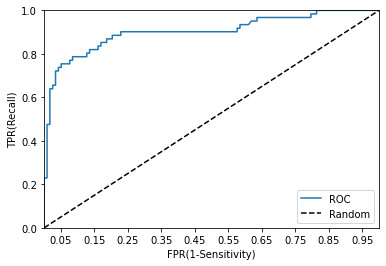

In [13]:
# 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

def roc_curve_plot(y_test, pred_proba_c1):
    
    # 임계값에 따른 FPR, TPR 값 반환
    fprs,tprs,thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC 곡선 그래프 그리기
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

## ✔ AUC

- ***분류의 성능 지표***로 사용되는 것은 ***ROC 곡선 면적에 기반한 AUC 값***


- ***AUC***
    - ROC 곡선 밑의 면적
    - **1에 가까울수록 좋은 ROC AUC 수치**
    - AUC 수치 : **FPR이 작은 상태**에서  **얼마나 큰 TPR을 얻을 수 있는가**의 문제

In [14]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1] # 확률 데이터 세트에서 1일 확률만 추출
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9025


# <font color = 'green'>get_clf_eval(y_test, pred=None, pre_proba=None)
    
- ***정확도, 정밀도, 재현율, F1 스코어, ROC AUC 값 출력하는 함수***

In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred) # 혼돈행렬
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred) # 정밀도
    recall = recall_score(y_test , pred) # 재현율
    # f1 스코어 추가
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# <font color = 'green'>피마 인디언 당뇨병 예측

## ✔ 데이터 세트 구성

- ***Pregnancies*** : 임신 횟수


- ***Glucose*** : 포도당 부하 검사 수치


- ***BloodPressure*** : 혈압


- ***SkinThickness*** : 팔 삼두근 뒤쪽의 피하지방 측정값


- ***Insulin*** : 혈청 인슐린


- ***BMI*** : 체질량지수(체중/키)


- ***DiabetesPedigreeFunction*** : 당뇨 내력 가중치 값


- ***Age*** : 나이


- ***Outcome*** : 클래스 결정 값(0또는 1)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('C:/Users/user/CUAI/DataSet/diabetes.csv') 
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [17]:
diabetes_data.info() 
# 별도의 피처 인코딩은 필요없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## ✔ 로지스틱 회귀로 예측 모델 생성하기

In [18]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y 추출
# 맨 끝이 OUTCOME 칼럼으로 레이블 값

x = diabetes_data.iloc[:,:-1] # outcomes 칼럼 제외 모두 추출
y = diabetes_data.iloc[:,-1] # outcomes 칼럼만 추출

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 : 0.6465, AUC : 0.8083


## ✔ 임곗값별 정밀도와 재현율 값의 변화

In [19]:
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1] # (768,2)크기 데이터 세트에서 Positive로 예측한 경우(칼럼 1) 추출

In [20]:
# 정밀도 재현율 시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundry = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundry], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundry],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

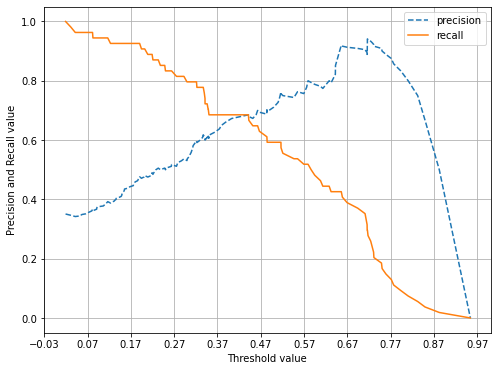

In [21]:
precision_recall_curve_plot(y_test, pred_proba_c1)

## ✔ min() = 0 인 데이터(Glucose, BloodPressure, SkinThickness, Insulin, BMI)처리

In [22]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

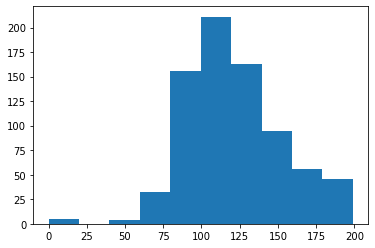

In [23]:
# Glucose(포도당 수치)
# Glucose 피처의 히스토그램
plt.hist(diabetes_data['Glucose'], bins = 10)

In [24]:
diabetes_data['Glucose'].count()

768

In [25]:
# min() 값이 0으로 돼 있는 피처
# 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 배율로 0 값이 존재하는가?

zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data['Glucose'].count() # 전체 데이터 건수 768

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [26]:
mean_zero_features = diabetes_data[zero_features].mean()
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [27]:
# 평균값으로 대체하기
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

In [28]:
x = diabetes_data.iloc[:,:-1] # outcomes 칼럼 제외 모두 추출
y = diabetes_data.iloc[:,-1] # outcomes 칼럼만 추출

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # 피처 데이터 세트에 일괄적으로 스케일링 적용

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


## ✔ 임곗값 변경 후 예측

- 전체적인 성능 평가 지표를 유지하면서 재현율을 향상시키는 임곗값은 ***0.48***
- 자세한 내용은 교재 181p 참고

In [43]:
binarizer = Binarizer(threshold=0.48) # 임곗값은 0.48

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,          F1: 0.6931, AUC:0.8433
